### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ  
### Факультет искусственного интеллекта  
### Дисциплина: Инструменты обработки и визуализации данных  
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2  
#### Студент:  Князев Арсений
#### Группа:   ЗФИбд-01-24  
#### Вариант № 15

In [ ]:
#!unzip DAV3_2025.zip
#!rm -rf __MACOSX
#!rm -rf DAV3_2025.zip

In [ ]:
#!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

In [ ]:
auto_mpg["data"].keys()

In [ ]:
data = auto_mpg["data"]
headers = data["headers"]
features = data["features"]
targets = data["targets"]
headers, features, targets

In [50]:
df = pd.DataFrame(features, columns=headers)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,NaN,8,307.0,130.0,3504,12.0,70,1,NaN
1,NaN,8,350.0,165.0,3693,11.5,70,1,NaN
2,NaN,8,318.0,150.0,3436,11.0,70,1,NaN
3,NaN,8,304.0,150.0,3433,12.0,70,1,NaN
4,NaN,8,302.0,140.0,3449,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,NaN,4,140.0,86.0,2790,15.6,82,1,NaN
394,NaN,4,97.0,52.0,2130,24.6,82,2,NaN
395,NaN,4,135.0,84.0,2295,11.6,82,1,NaN
396,NaN,4,120.0,79.0,2625,18.6,82,1,NaN


In [51]:
df["car_name"] = data["ids"]
df["mpg"] = targets
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [52]:
df.columns

Index(['car_name', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'mpg'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [54]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?' или другая строка), то заполните их __медианными значениями признаков__.

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните __дискретизацию__ этого столбца, перейдя к 4-5 диапазонам значений. 

4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. Выведите __названия найденных признаков__.

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде __тепловой карты__ (heat map). 

6. Визуализируйте набор данных в виде __диаграммы рассеяния__ на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

7. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде __диаграммы рассеяния__ на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

### 2
____

Проверяем типы признаков, преобразуем все числовые к числовому типу и заполняем пропущенные значения медианой.

In [ ]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
numeric_cols = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
]

### 3
___

Если целевой столбец содержит много уникальных значений, делим его на 4–5 категорий (бинов) для упрощения анализа.

In [57]:
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [ ]:
if df["mpg"].nunique() > 10:
    df["mpg_binned"] = pd.qcut(df["mpg"], q=4)
    print("Дисретизированно")

Дисретизированно


In [62]:
df.mpg_binned

0       (17.5, 23.0]
1      (8.999, 17.5]
2       (17.5, 23.0]
3      (8.999, 17.5]
4      (8.999, 17.5]
           ...      
393     (23.0, 29.0]
394     (29.0, 46.6]
395     (29.0, 46.6]
396     (23.0, 29.0]
397     (29.0, 46.6]
Name: mpg_binned, Length: 398, dtype: category
Categories (4, interval[float64, right]): [(8.999, 17.5] < (17.5, 23.0] < (23.0, 29.0] < (29.0, 46.6]]

### 4
___

С помощью SelectKBest(f_classif) находим два признака, которые сильнее всего связаны с целевым столбцом.

In [ ]:
X = df[numeric_cols].values
y_encoded = LabelEncoder().fit_transform(df["mpg_binned"])

selector = SelectKBest(
    score_func=f_classif, k=2
)  # можно заменить на chi2, если признаки неотрицательные
selector.fit(X, y_encoded)
mask = selector.get_support()
top_features = [col for col, m in zip(numeric_cols, mask) if m]

In [66]:
top_features

['displacement', 'weight']

### 5
___

Вычисляем корреляцию между топ-2 признаками и целевой переменной, визуализируем её с помощью теплокарты.

In [ ]:
df["target_code"] = y_encoded

In [73]:
df[["displacement", "weight", "target_code"]].corr()

,displacement,weight,target_code
displacement,1.000000,0.932824,-0.832766
weight,0.932824,1.000000,-0.851466
target_code,-0.832766,-0.851466,1.000000


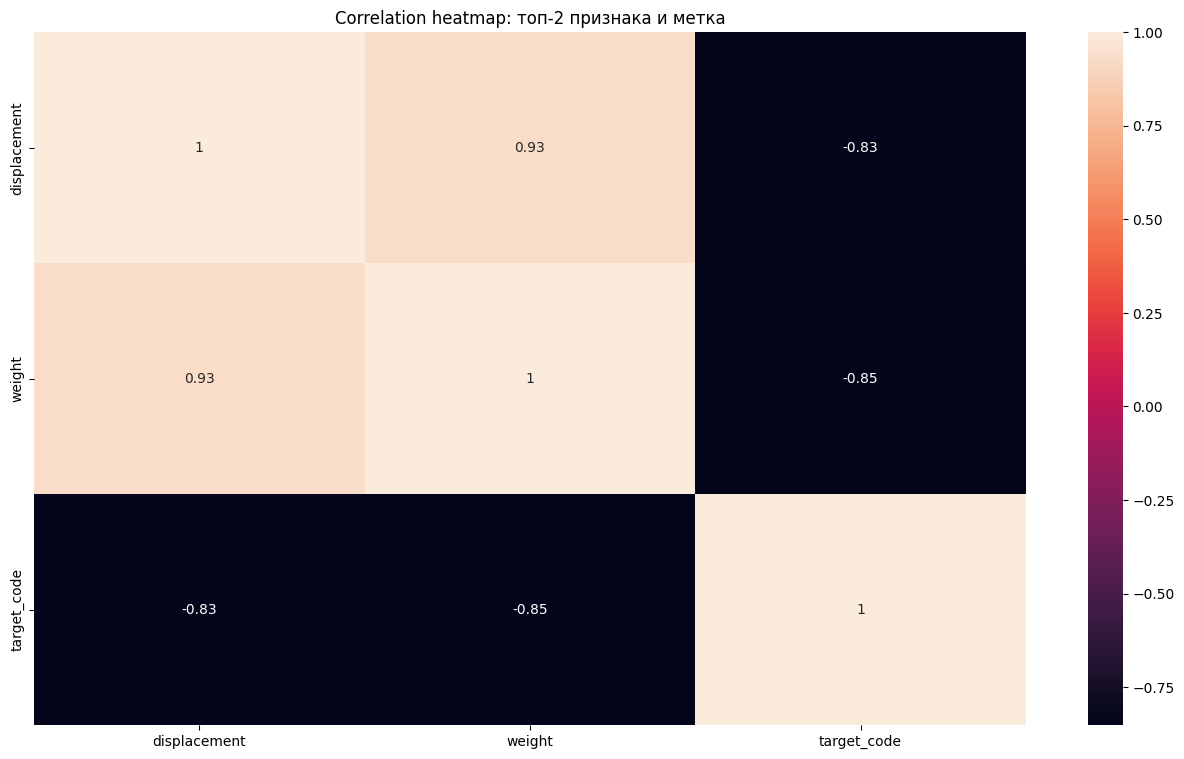

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df[["displacement", "weight", "target_code"]].corr(), annot=True)
plt.title("Correlation heatmap: топ-2 признака и метка")
plt.show()

### 6
___

Строим scatter plot, где оси — топ-2 признака, а цвет точек — категории целевого столбца.

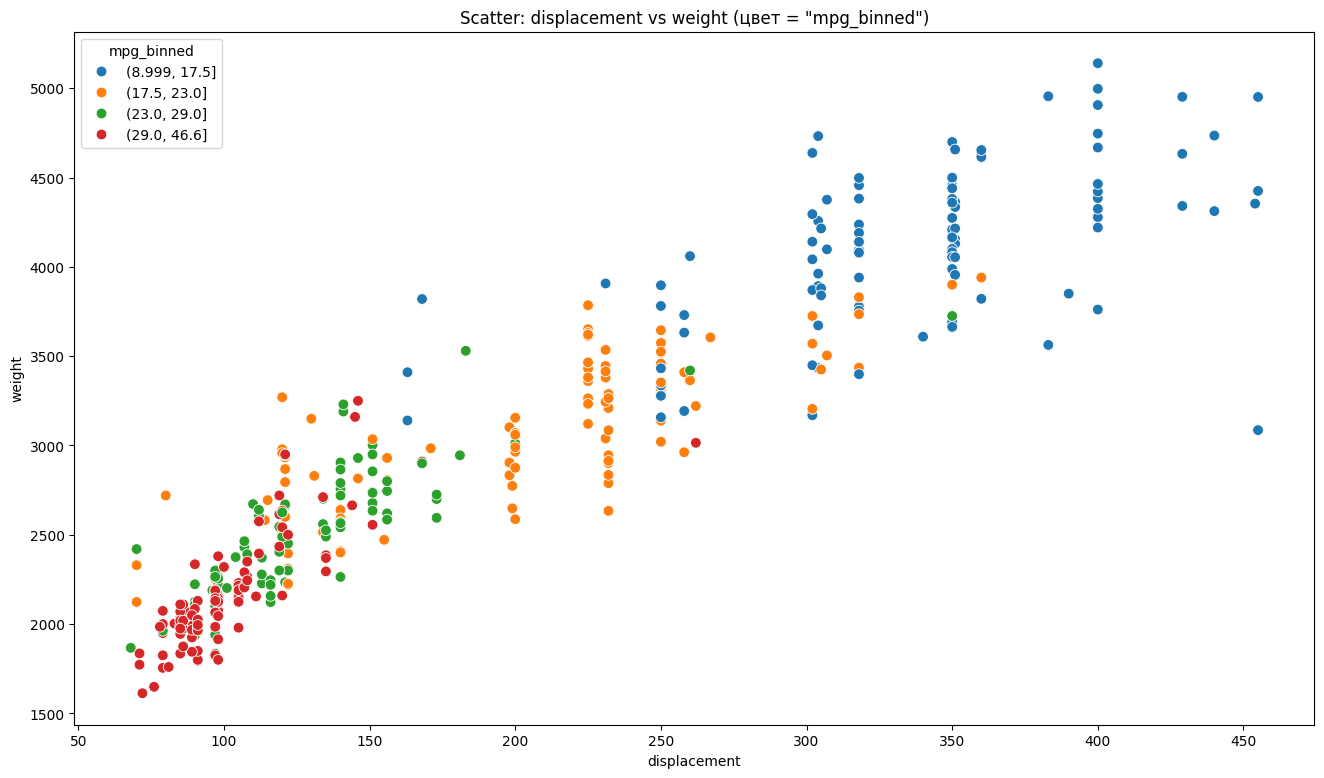

In [82]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x=top_features[0], y=top_features[1], hue="mpg_binned", s=60)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Scatter: {top_features[0]} vs {top_features[1]} (цвет = "mpg_binned")')
plt.legend(title="mpg_binned")
plt.show()

### 7
___

Снижаем размерность всех числовых признаков до 2 компонент с помощью PCA и строим scatter plot для визуализации структуры классов.

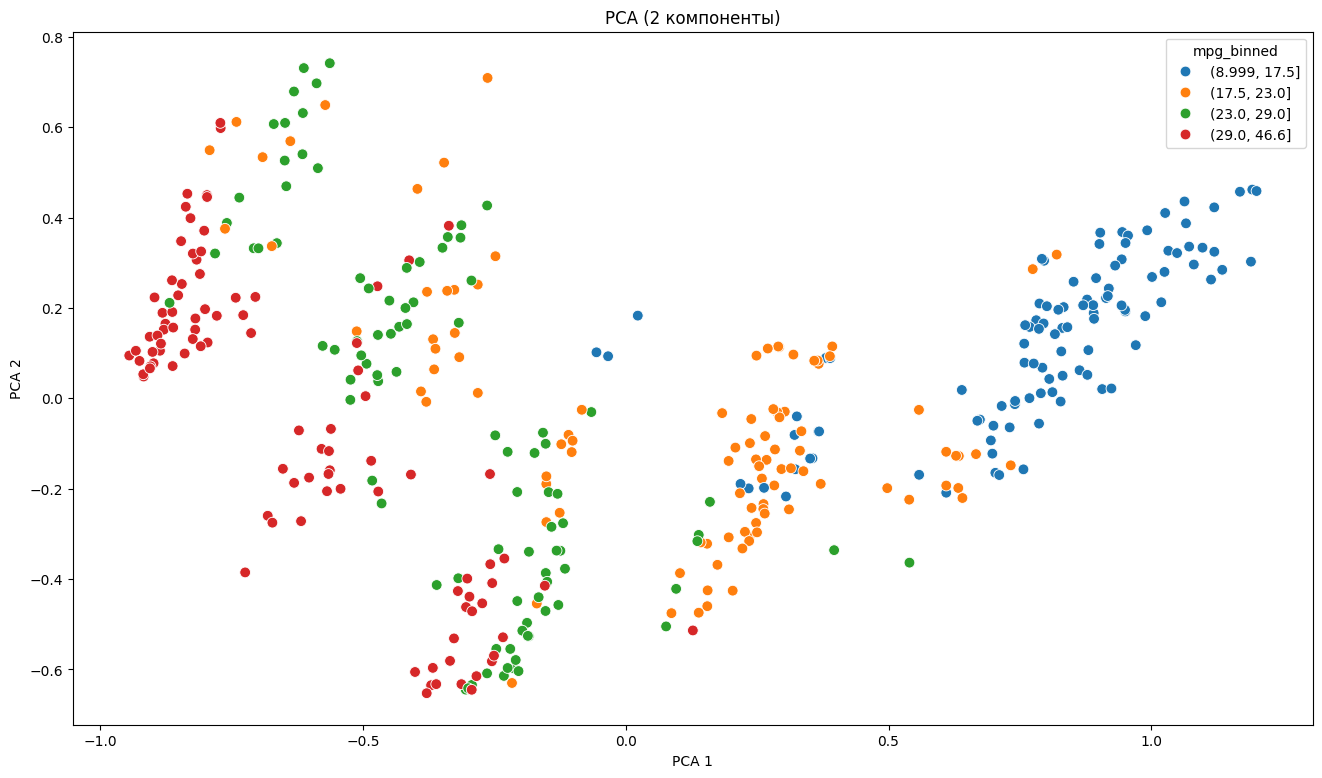

In [ ]:
X_scaled = MinMaxScaler().fit_transform(df[numeric_cols])
pca = PCA(n_components=2, random_state=42)
pca_res = pca.fit_transform(X_scaled)
df["pca1"], df["pca2"] = pca_res[:, 0], pca_res[:, 1]

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="mpg_binned", s=60)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA (2 компоненты)")
plt.legend(title="mpg_binned")
plt.show()